In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# download and read wisconsin breast cancer data
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
     'machine-learning-databases'
     '/breast-cancer-wisconsin/wdbc.data',
     header=None)

In [3]:
# We have 31 columns and 569 rows of data. No null or missing data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [4]:
# See the first 5 rows of the dataset, the first column(0) is a unique ID
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# the second column, representing value counts for B(benign) and M(malignant).
df[1].value_counts()

B    357
M    212
Name: 1, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
# Assign the target variable to y and the other 30 features to X as Numpy arrays.
X = df.loc[:,2:].values
y = df.loc[:,1].values

In [8]:
# fit the model to the data then transform the data according to the fitted model.
# The classes will be as 1 and 0 for M and B. 
y = le.fit_transform(y)

In [9]:
# example of the previous code
le.transform(['M','B'])

array([1, 0], dtype=int64)

In [10]:
# Split the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.20,
                                                   stratify=y,
                                                   random_state=1)

### Combining transformers and estimators into a pipline

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [12]:
# create an instance of the make_pipeline object
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2),
                       LogisticRegression(random_state=1, solver='lbfgs'))

In [13]:
# fit training dataset to the model
pipe_lr.fit(X_train,y_train)
# predict on unseen data
y_pred = pipe_lr.predict(X_test)
# print out accuracy score of the model on the test dataset
print('Test Accuracy: %.3f' %pipe_lr.score(X_test,y_test))

Test Accuracy: 0.956


Assessing Model Performance using k-fold

In [14]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
# In stratified cross validation, the class label proportions are preserved

In [15]:
scores=[]

for k,(train,test) in enumerate(kfold):
    pipe_lr.fit(X_train[train],y_train[train])
    score=pipe_lr.score(X_train[test],y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f'%(k+1,np.bincount(y_train[train]),score))
    

Fold:  1, Class dist.: [256 153], Acc: 0.935
Fold:  2, Class dist.: [256 153], Acc: 0.935
Fold:  3, Class dist.: [256 153], Acc: 0.957
Fold:  4, Class dist.: [256 153], Acc: 0.957
Fold:  5, Class dist.: [256 153], Acc: 0.935
Fold:  6, Class dist.: [257 153], Acc: 0.956
Fold:  7, Class dist.: [257 153], Acc: 0.978
Fold:  8, Class dist.: [257 153], Acc: 0.933
Fold:  9, Class dist.: [257 153], Acc: 0.956
Fold: 10, Class dist.: [257 153], Acc: 0.956


In [16]:
# implementation by sklearn of above code 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr,
                        X=X_train,
                        y=y_train,
                        cv=10,
# n_jobs sets how many CPU will be used to evaluate, if n_jobs=-1, all CPU's will be used
                        n_jobs=-1)
print('CV accuracy scores: %s' %scores)
print('CV accuracy: %.3f +/- %.3f' %(np.mean(scores),np.std(scores)))

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV accuracy: 0.950 +/- 0.014


### Validation Curves
We can use learning curves to diagnose whether a learning algorithm has a problem with overfitting(high variance) or underfitting(high bias)

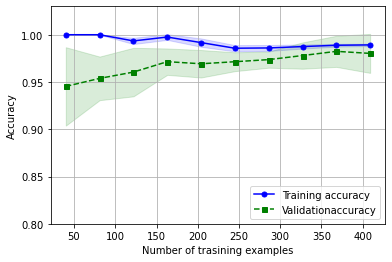

In [19]:
from sklearn.model_selection import learning_curve
# create pipeline object
pipe_lr = make_pipeline(StandardScaler(), 
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                          solver='lbfgs',
                                          max_iter=10000))

# By default the learning_curve function uses stratified k-fold cross-validation
train_sizes,train_scores,test_scores=learning_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    # the parameter cv=10 sets k=10 for 10-fold stratified cross-validation
    train_sizes=np.linspace(0.1, 1.0, 10),cv=10, n_jobs=1)

train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o',
        markersize=5, label='Training accuracy')
# fill-between function takes std of the average accuracy to indicate variance
plt.fill_between(train_sizes,train_mean + train_std, train_mean - train_std,
                alpha=0.15,color='blue')

plt.plot(train_sizes, test_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,label='Validationaccuracy')

plt.fill_between(train_sizes, test_mean + test_std,
                test_mean - test_std,
                alpha = 0.15,
                color='green')

plt.grid()
plt.xlabel('Number of trasining examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.03])
plt.show()